# DSC410: Model Tuning
---

**Name**: Joseph Choi <br>
**Class**: DSC410-T301 Predictive Analytics (2243-1)

## Instructions:
1. Perform EDA (possibly including data cleansing) and feature engineering as needed.
2. Create a model that predicts "Claim" (i.e., Claim is your target variable).
3. Report model metrics appropriate for a classification model.
4. Use the techniques from Week 6 to tune your model. Minimally use cross-fold validation, although hyperparameter tuning is advised.
5. Thoroughly document why you made your programming choice within the Jupyter Notebook as Markdown comments before each (important) code block.

## Table of Contents:
- Data Cleaning
- EDA
- Data Preprocessing and Feature Engineering
- Model Training
- Model Tuning
- Model Retraining

## Data Cleaning:
**Objective**: 
1. Exploring the dataset to understand what needs to be cleaned
2. Observation/Interpretation from initial data exploration (cleaning)
3. Addressing issues and ensuring that the dataset is ready for EDA

In [4]:
# Setup
import pandas as pd
import numpy as np

In [5]:
# Loading travel_insurance csv file and displaying results

travel_insurance = pd.read_csv('travel_insurance.csv')
travel_insurance.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [6]:
# Displaying a summary of the dataset to gain insights into its structure and composition:
    # Checking information on null values per column 
    # Ensuring each column has the correct data type

travel_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [7]:
# Displaying summary for numerical features:
    # Checking numerical measures like mean, median, and quartiles
    
numerical_summary = travel_insurance.describe()
numerical_summary

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [8]:
# Displaying summary for categorical features:
    # Exploring distribution and frequency for each categorical column
    # Identifying potential need for standardization in categorical columns
    # Verifying that only categorical features are present, ensuring exclusion of numerical features
    
categorical_features = travel_insurance.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"\nDistribution of {feature}:")
    print(travel_insurance[feature].value_counts())


Distribution of Agency:
Agency
EPX    35119
CWT     8580
C2B     8267
JZI     6329
SSI     1056
JWT      749
RAB      725
LWC      689
TST      528
KML      392
ART      331
CCR      194
CBH      101
TTW       98
CSR       86
ADM       82
Name: count, dtype: int64

Distribution of Agency Type:
Agency Type
Travel Agency    45869
Airlines         17457
Name: count, dtype: int64

Distribution of Distribution Channel:
Distribution Channel
Online     62219
Offline     1107
Name: count, dtype: int64

Distribution of Product Name:
Product Name
Cancellation Plan                       18630
2 way Comprehensive Plan                13158
Rental Vehicle Excess Insurance          8580
Basic Plan                               5469
Bronze Plan                              4049
1 way Comprehensive Plan                 3331
Value Plan                               2715
Silver Plan                              2249
Annual Silver Plan                       1423
Ticket Protector                         1

In [9]:
# Displaying null value count per feature:
    # Created to understand null value spread throughout dataset

null_count = travel_insurance.isnull().sum()
null_count

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [10]:
# Displaying null value percentage per feature
    # Created to understand null value percentage spread throughout dataset

null_percentage = (travel_insurance.isnull().sum() / len(travel_insurance)) * 100
null_percentage = null_percentage.round(3)
null_percentage

Agency                   0.00
Agency Type              0.00
Distribution Channel     0.00
Product Name             0.00
Claim                    0.00
Duration                 0.00
Destination              0.00
Net Sales                0.00
Commision (in value)     0.00
Gender                  71.23
Age                      0.00
dtype: float64

### 2. Observation/Interpretation from initial data exploration (Cleaning):

**NULL Values**: 
All columns, except for the 'Gender' column, do not contain any 'NaN' values. Upon reviewing the 'Gender' column across the entire dataset, I am considering removing the column entirely due to several reasons:
- 71% of the column consists of NULL values.
- Only 29% of the column contains actual values (M/F).
- The high percentage of NULL values makes it impractical for imputation.
- The column is incomplete and unlikely to contribute meaningfully to the model training process.

### 3. Addressing issues and ensuring that the dataset is ready for EDA:

In [19]:
# Creating a copy of the df to perform data cleaning procedures

travel_insurance_cleaning = travel_insurance.copy()

In [20]:
# Removing column "Gender" from the dataframe

travel_insurance_cleaning.drop(columns=['Gender'], inplace=True)
travel_insurance_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB


## EDA (Exploratory Data Analysis)
**Objective**: 
1. Build plots to gain insights that will guide the preprocessing and feature engineering process
    - **Univariate**:
        - Histograms (numerical distribution)
        - Bar charts (categorical distribution)
        - Boxplots (outliers)
    - **Bivariate**:
        - Countplots (relationship: categorical vs "Claims")
        - Correlation matrix (relationship: numerical vs "Claims")
2. Observation/Interpretation from the plots

In [21]:
# Setup
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Build plots to gain insights that will guide the preprocessing and feature engineering process:

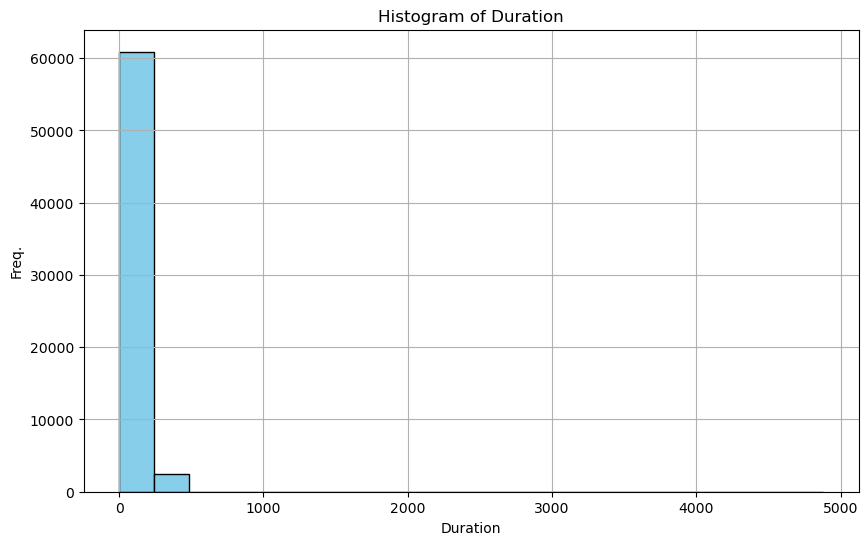

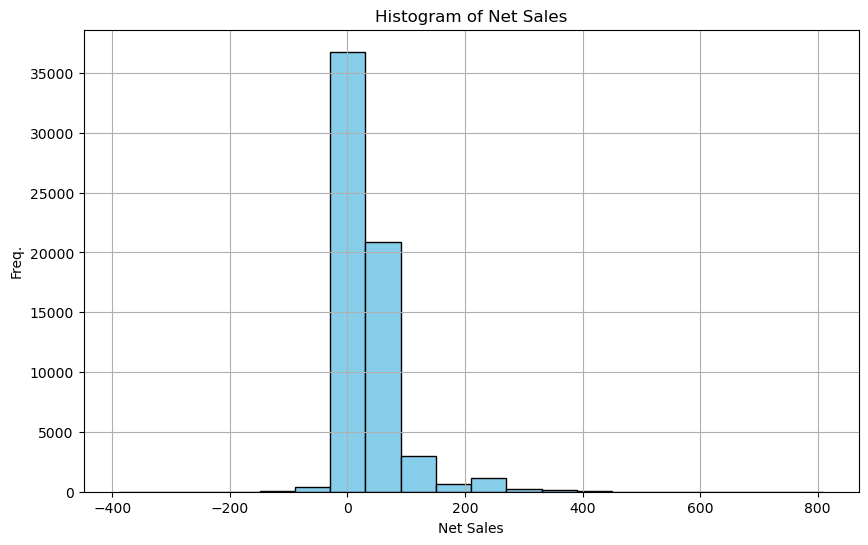

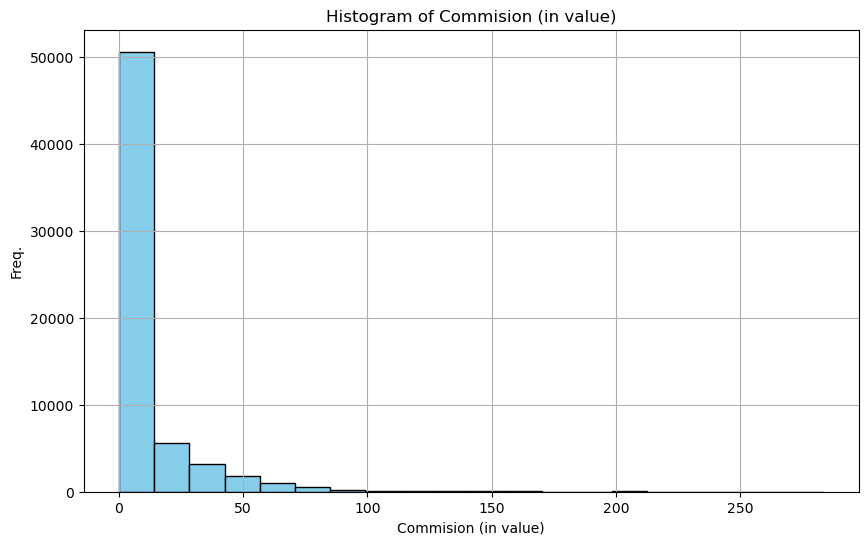

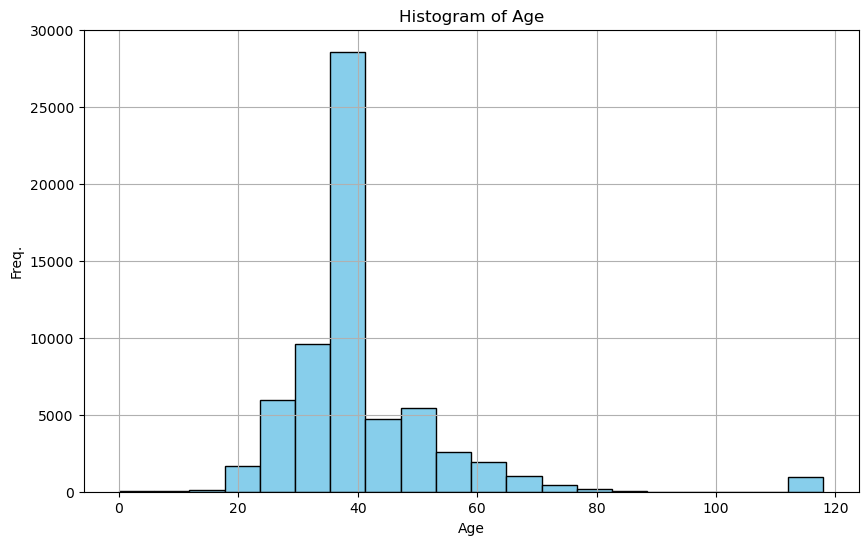

In [22]:
# Histograms:

# Selecting only numerical columns
numerical_columns = travel_insurance_cleaning.select_dtypes(include=['int64', 'float64'])

# Plotting histograms for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(travel_insurance_cleaning[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Freq.')
    plt.title(f'Histogram of {column}')
    plt.grid(True)
    plt.show()

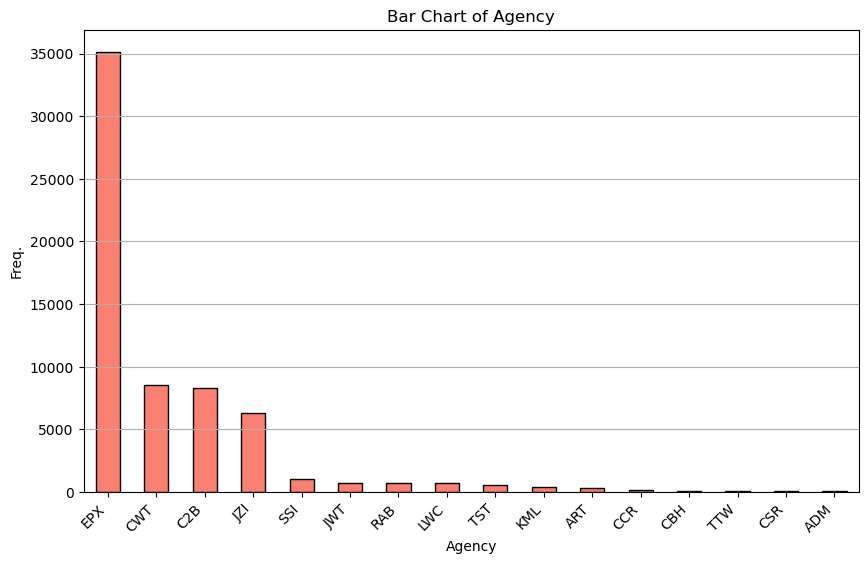

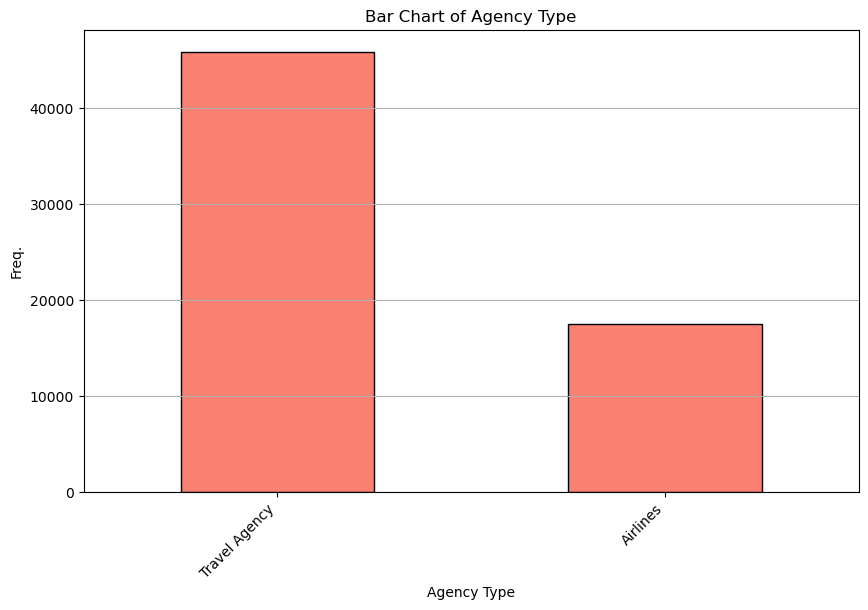

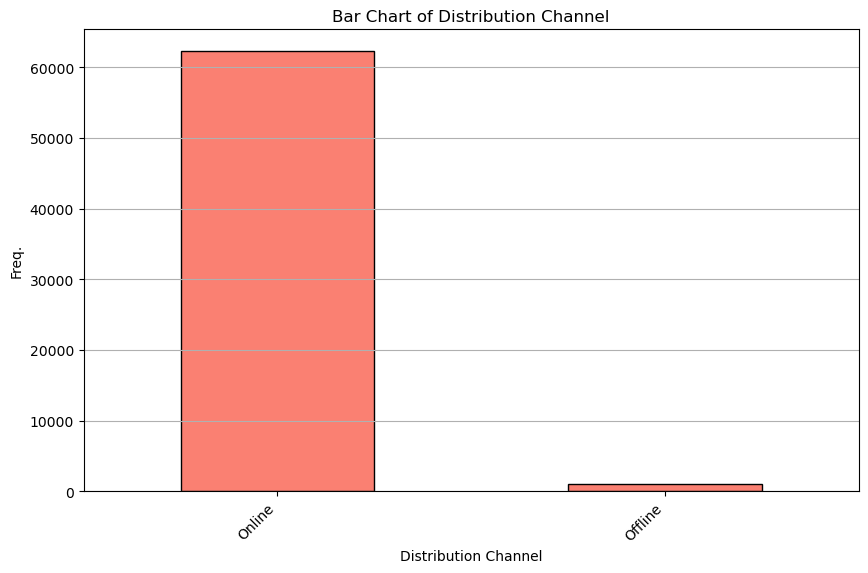

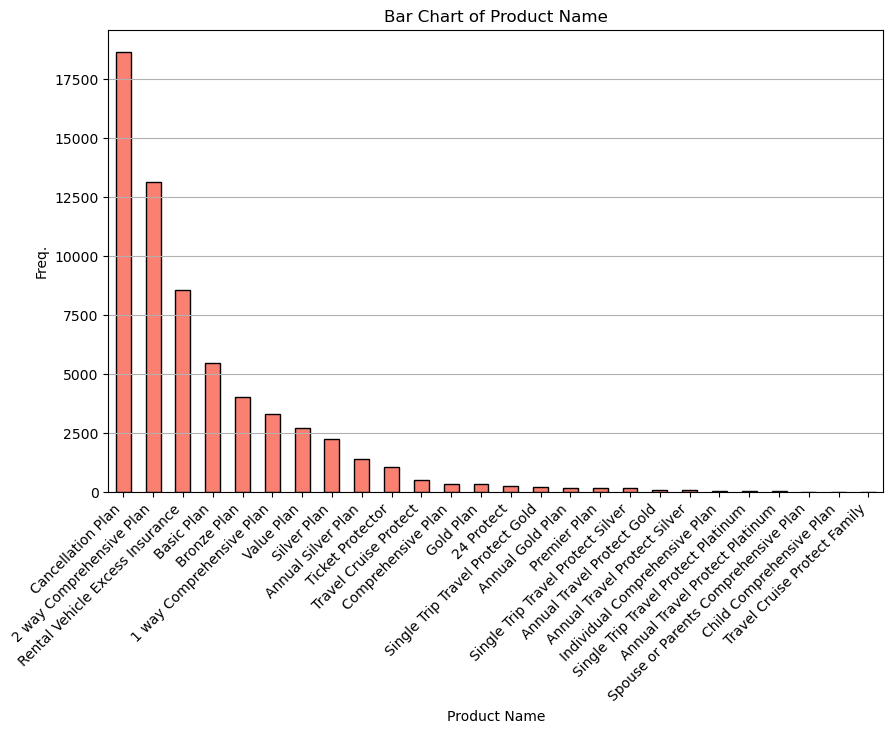

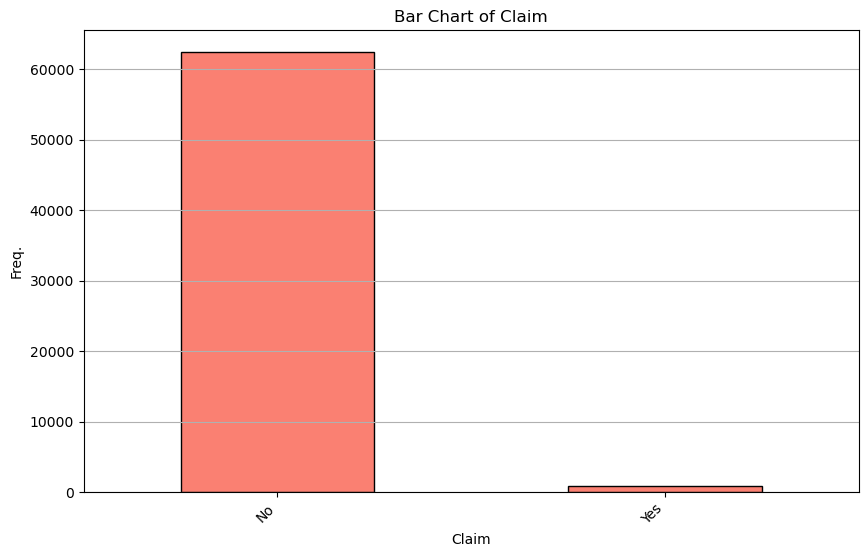

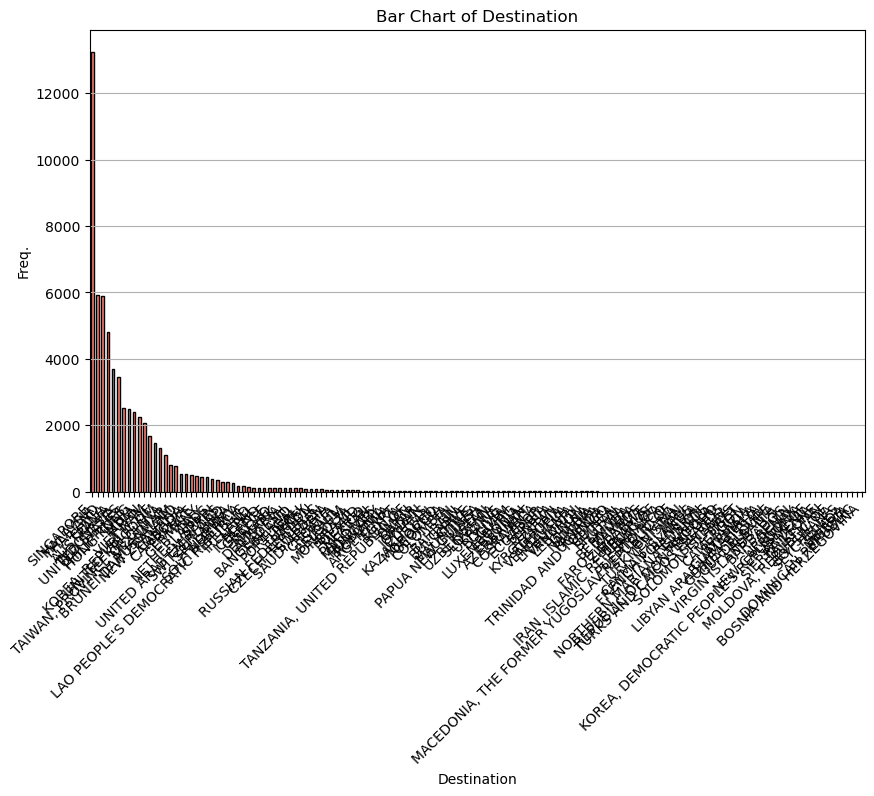

In [23]:
# Bar Charts:

# Selecting only object columns
object_columns = travel_insurance_cleaning.select_dtypes(include=['object'])

# Plotting bar charts for each object column
for column in object_columns.columns:
    plt.figure(figsize=(10, 6))
    object_counts = travel_insurance_cleaning[column].value_counts()
    object_counts.plot(kind='bar', color='salmon', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Freq.')
    plt.title(f'Bar Chart of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y')
    plt.show()

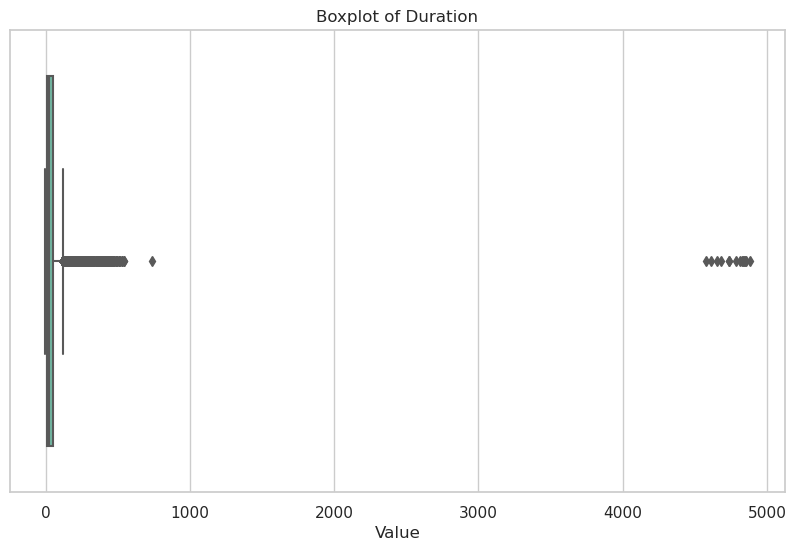

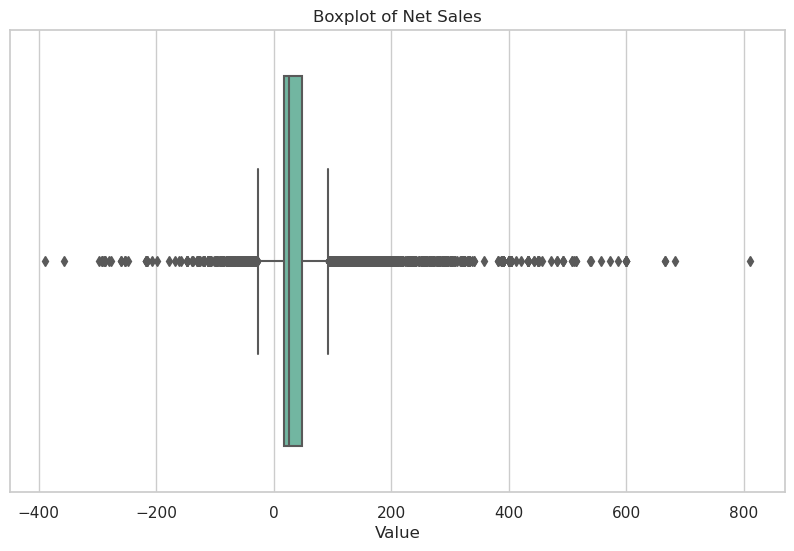

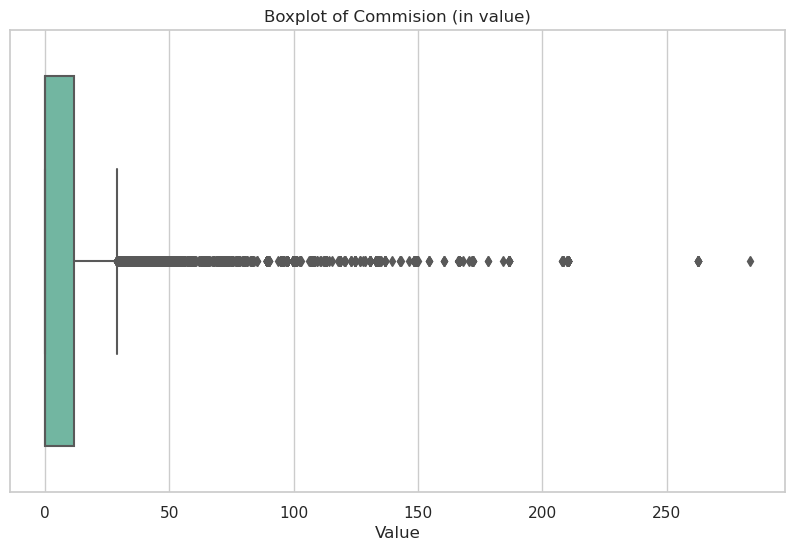

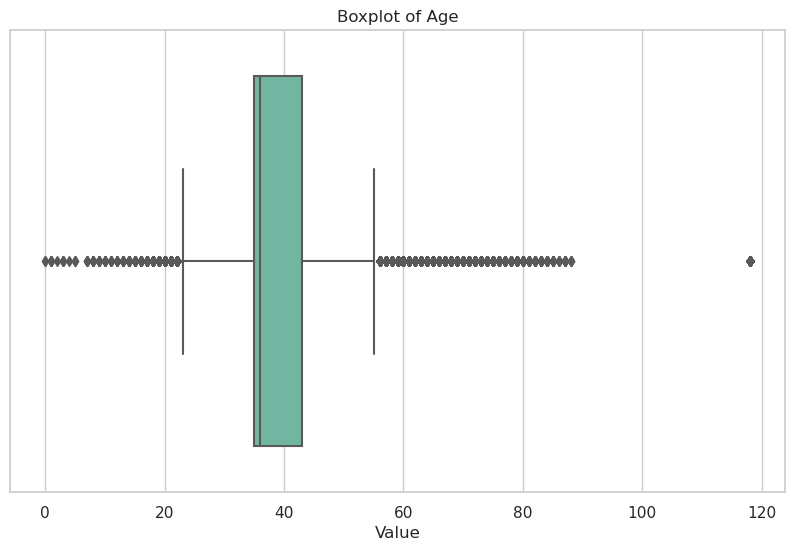

In [51]:
# Boxplots:

# Setting style
sns.set(style="whitegrid")

# Creating separate boxplots for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(x=numerical_columns[column], palette='Set2')  
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Value')
    plt.show()

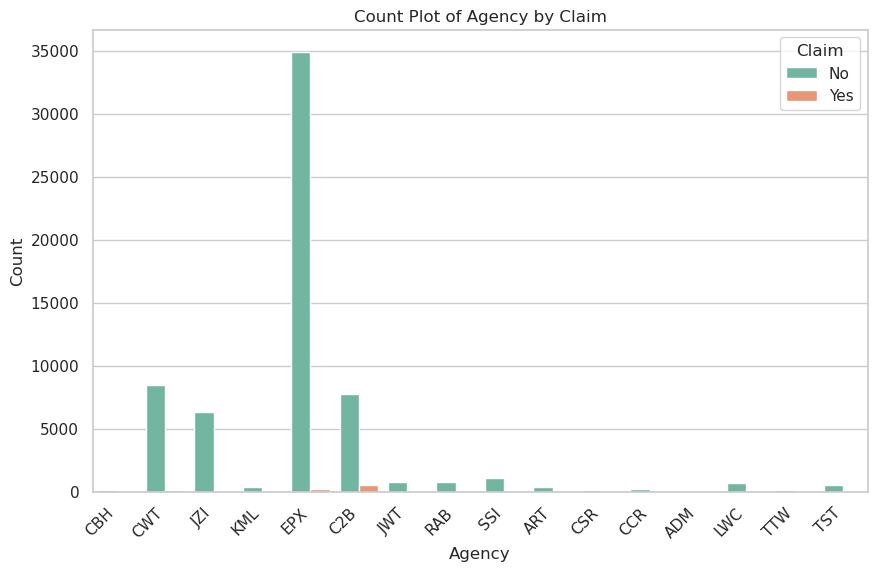

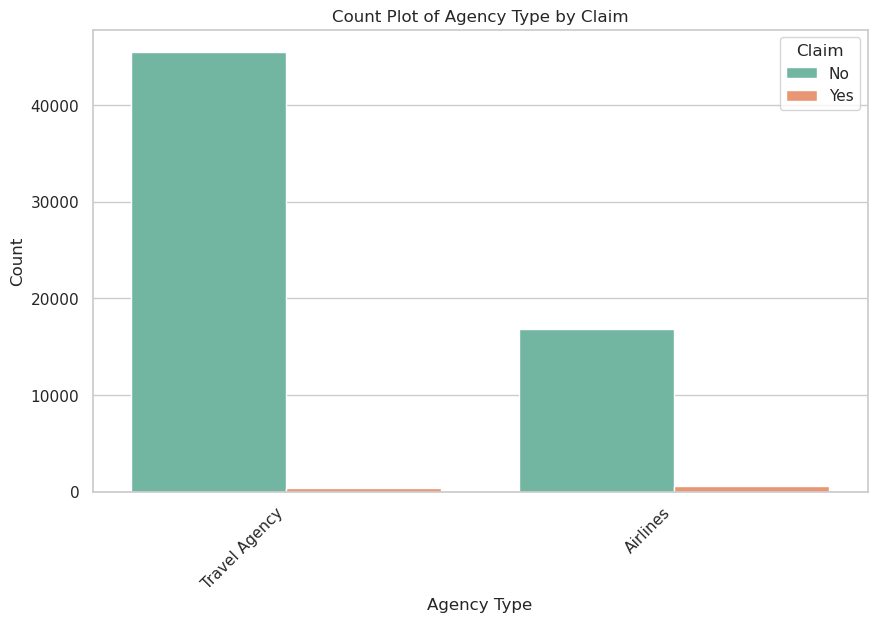

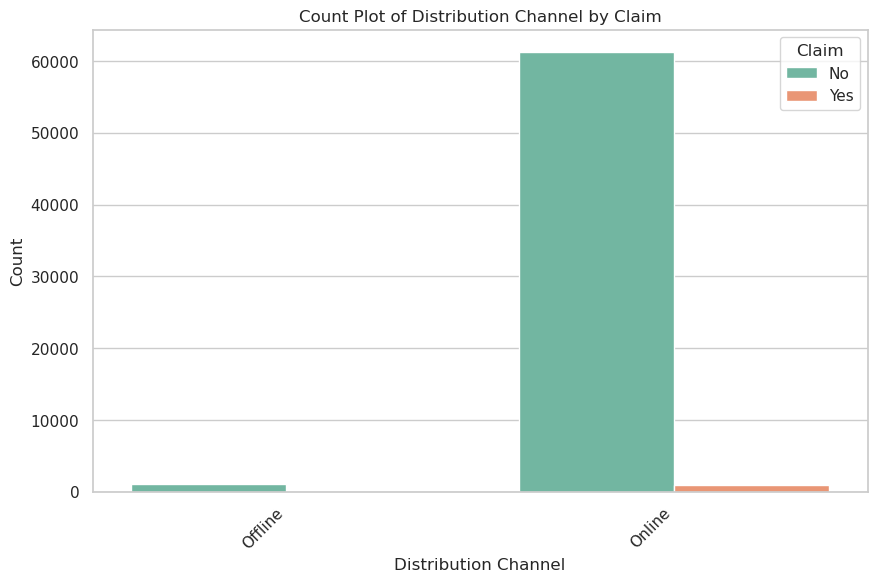

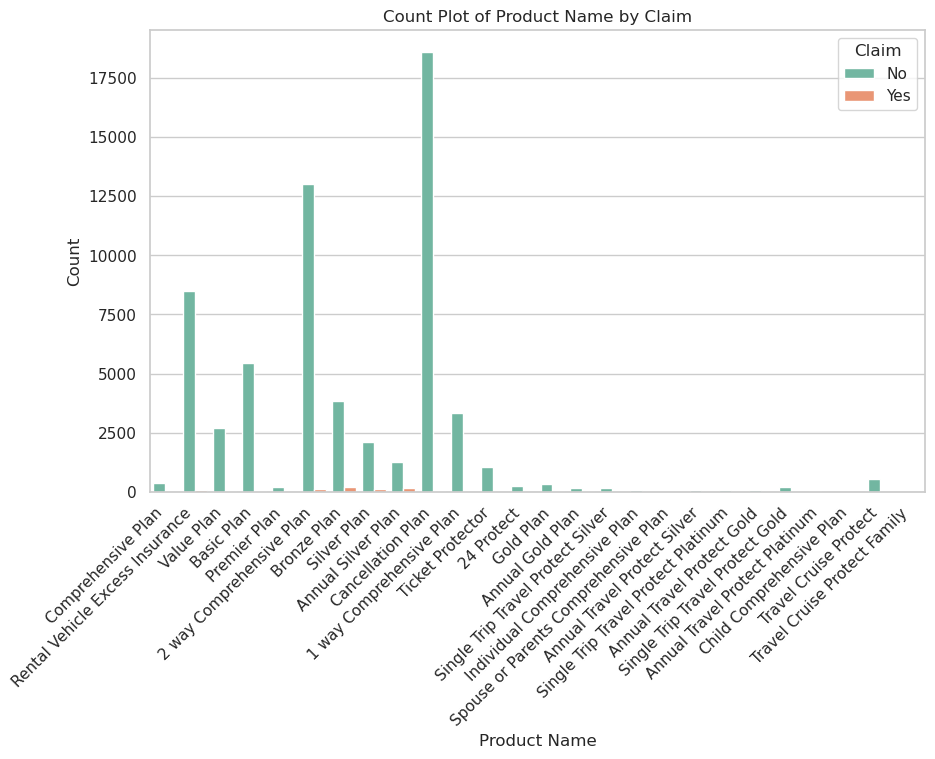

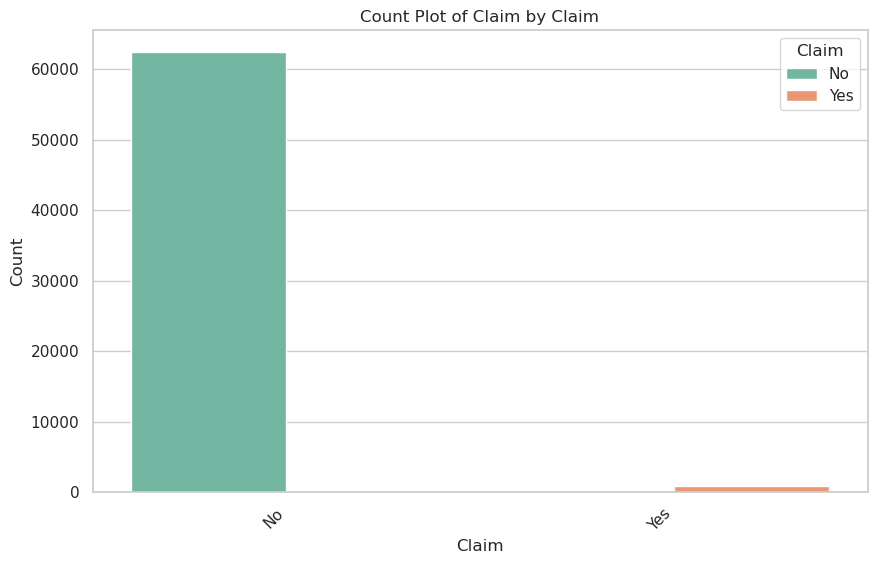

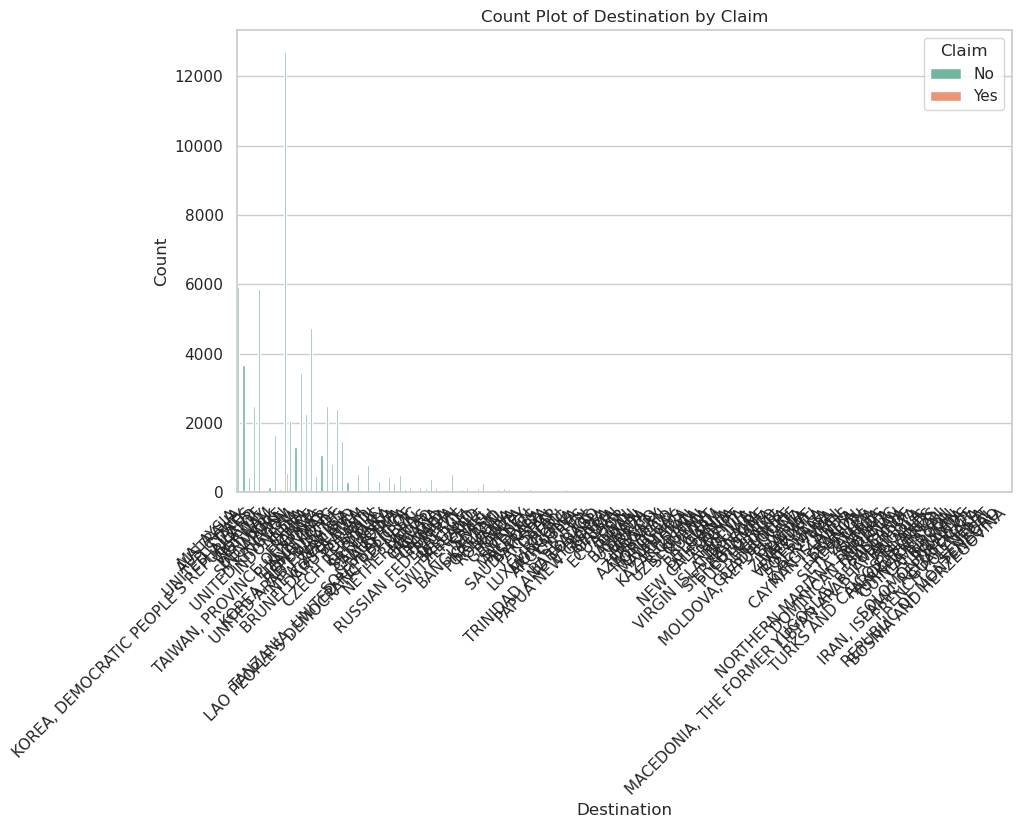

In [52]:
# Countplots:

# Setting style
sns.set(style="whitegrid")

# Creating count plots for each categorical column
for column in categorical_columns.columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.countplot(x=column, hue='Claim', data=travel_insurance_cleaning, palette='Set2')
    plt.title(f'Count Plot of {column} by Claim')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Claim', loc='upper right')
    plt.show()

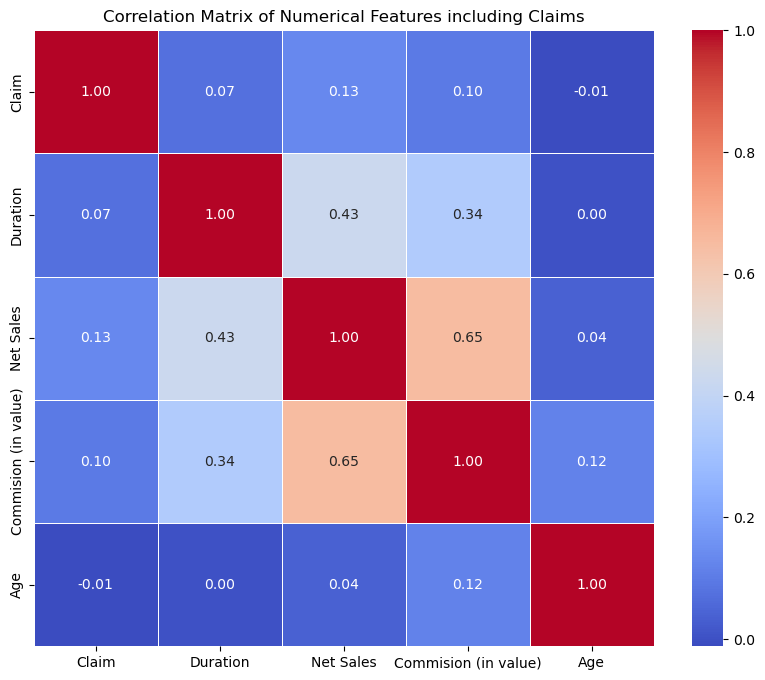

In [24]:
# Correlation Matrix:

# Creating a copy to perform preprocessing and feature engineering procedures
travel_insurance_fe = travel_insurance_cleaning.copy()

# Converting 'Claim' column to numerical (1 for 'Yes', 0 for 'No')
travel_insurance_fe['Claim'] = travel_insurance_fe['Claim'].map({'Yes': 1, 'No': 0})

# Selecting numerical columns for correlation matrix
numerical_columns = travel_insurance_fe.select_dtypes(include=['int64', 'float64'])

# Computing correlation matrix
correlation_matrix = numerical_columns.corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features including Claims')
plt.show()

### 2. Observations/Interpretation from the plots:

#### Histograms:
- **Duration**: Shows a long bar and short bar on the left side, indicating a concentration of shorter durations. Distribution indicates that most travel durations are short
- **Net Sales**: Shows bars populated in the middle-left area, indicating a concentration of sales within the 0-100 range. Blank areas on both ends suggest very few data points in the extreme sales ranges
- **Commission**: Shows a tall bar on the extreme left side, indicating a significant number of instances with low commission values. Several bars gradually decreasing in height from left to right suggests a decreasing frequency of higher commission values. Indicates that a large proportion of commissions are low 
- **Age**: Shows bars populated in the middle-left area, indicating a concentration of ages within the 30-50 range. Small bar all the way to the right suggests a few instances of older ages

#### Bar Charts:
- All of the bar charts displayed a clear pattern of high volume concentrated within a few prominent categories
- It then was followed by a substantial decline as the chart extends towards the right
- Distribution suggests a skew towards specific categories within each feature
- Target variable "Claim" mainly has the category 'No', implying that the dataset is mainly composed of instances where claims are not made

#### Boxplots:
- All of the boxplots show numerous outliers as there are many data points extending beyond the whiskers
- Outliers suggest potential anomalies or extreme values within the data distribution
- Outliers may be genuine data points or anomalies that could significantly influence the model's behavior. Therefore, I am considering keeping them.

#### Countplots:
- All of the countplots consistently show the dominating target category "No" across all categorical columns
- This dominance suggests an imbalance in the distribution of responses or outcomes

#### Correlation Matrix:
- Correlations between the target variable and other numerical features are relatively weak (range: -0.01 to 0.13)
- Numerical features may not be strong predictors of claim status 

#### My Thought Process:
Last assignment, I grouped less frequent categories and removed outliers. For this week's assignment, I have decided not to include these steps because:
- Grouping less frequent categories can lead to loss of information and possible distortion (changes) of the original data distribution. By keeping the original categories, I am hoping to keep the integrity of the dataset.
- Outliers may contain valuable information and present genuine data points. So here, removing outliers can potentially distort the patterns in the data and affect the model's ability to capture important insights to make predictions.
- As the data strongly lean towards the target category "No" (indicating no claims), it suggests a dominant signal in the dataset. Therefore, I am hesitant to make changes or remove data points, as they are all strong indicators of the dataset.  

As for this week's data preprocessing and feature engineering, I am sticking to just encoding so that I can convert my categorical features into numerical data. As models train better and are more compatible to numerical formats, I will conduct encoding procedures to my dataset.  

## Data Preprocessing and Feature Engineering
- Preprocessing data and applying feature engineering to make it suitable for modeling
- **Objective**:
    - Encoding:
        - Manual encoding for features with small unique counts as it offers better control and clarity
        - Label encoding for features with many unique counts as referenced in https://heartbeat.comet.ml/a-practical-guide-to-feature-engineering-in-python-8326e40747c8

In [16]:
#Setup
import category_encoders as ce

In [25]:
#Checking the number of unique classes
cat_cols = travel_insurance_fe.select_dtypes(include='object').columns
for col in cat_cols:
    print("Number of classes in {}".format(col))
    print(travel_insurance_fe[col].nunique())
    print('--------------------------')

Number of classes in Agency
16
--------------------------
Number of classes in Agency Type
2
--------------------------
Number of classes in Distribution Channel
2
--------------------------
Number of classes in Product Name
26
--------------------------
Number of classes in Destination
149
--------------------------


In [26]:
# As Claim, Distribution, and Agency Type have small unique counts, I will apply manual encoding for these features:
# Claim feature has already been updated in previous code

# Agency Type & Distribution Channel Encoding:

# Defining mappings for Agency Type
agency_type_mapping = {'Travel Agency': 0, 'Airlines': 1}

# Define mappings for Distribution Channel
distribution_channel_mapping = {'Online': 0, 'Offline': 1}

# Applying mapping to the DataFrame
travel_insurance_fe['Agency Type Encoded'] = travel_insurance_fe['Agency Type'].map(agency_type_mapping)
travel_insurance_fe['Distribution Channel Encoded'] = travel_insurance_fe['Distribution Channel'].map(distribution_channel_mapping)

# Printing the updated DataFrame
travel_insurance_fe[['Agency Type', 'Agency Type Encoded', 'Distribution Channel', 'Distribution Channel Encoded']].head()

,Agency Type,Agency Type Encoded,Distribution Channel,Distribution Channel Encoded
0,Travel Agency,0,Offline,1
1,Travel Agency,0,Offline,1
2,Travel Agency,0,Online,0
3,Travel Agency,0,Online,0
4,Travel Agency,0,Online,0


In [27]:
# For all of my columnes with large number of classes, I will be using label encoding. 
# Referenced code from: https://heartbeat.comet.ml/a-practical-guide-to-feature-engineering-in-python-8326e40747c8

cat_cols = travel_insurance_fe.select_dtypes(include='object').columns
cat_cols = ['Agency', 'Product Name', 'Destination']
encoder = ce.OrdinalEncoder(cols=cat_cols)
travel_insurance_encoded = encoder.fit_transform(travel_insurance_fe)

# Dropping unnecessary columns
travel_insurance_encoded.drop(['Agency Type', 'Distribution Channel'], axis=1, inplace=True)

In [28]:
# Showing final df with all categorical columns encoded

# This df will be used for model training

travel_insurance_encoded.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Agency,1.00,1.00,2.0,2.00,2.00,3.00,2.00,2.00,2.00,2.0,3.0,3.0,4.0,2.00,5.0,2.00,2.00,2.00,3.0,2.00
Product Name,1.00,1.00,2.0,2.00,2.00,3.00,2.00,2.00,2.00,2.0,4.0,4.0,5.0,2.00,6.0,2.00,2.00,2.00,4.0,2.00
Claim,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00
Duration,186.00,186.00,65.0,60.00,79.00,66.00,47.00,63.00,57.00,186.0,33.0,1.0,53.0,5.00,39.0,6.00,48.00,11.00,3.0,14.00
Destination,1.00,1.00,2.0,2.00,3.00,4.00,4.00,2.00,5.00,2.0,6.0,1.0,7.0,1.00,8.0,9.00,9.00,4.00,1.0,5.00
Net Sales,-29.00,-29.00,-49.5,-39.60,-19.80,-121.00,-39.60,-108.90,-19.80,-99.0,-26.0,-18.0,-130.0,-39.60,-25.0,-19.80,-79.20,-29.70,-18.0,-69.30
Commision (in value),9.57,9.57,29.7,23.76,11.88,42.35,23.76,65.34,11.88,59.4,9.1,6.3,49.4,23.76,0.0,11.88,47.52,17.82,6.3,41.58
Age,81.00,71.00,32.0,32.00,41.00,44.00,32.00,29.00,44.00,37.0,118.0,47.0,48.0,64.00,36.0,53.00,43.00,58.00,47.0,37.00
Agency Type Encoded,0.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00,0.00,0.0,1.0,1.0,0.0,0.00,0.0,0.00,0.00,0.00,1.0,0.00
Distribution Channel Encoded,1.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00


## Model Training
- Choosing the right algorithm for binary classification
- Training the model using the cleaned and preprocessed data

In [87]:
#setup
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [85]:
# Splitting the data into features and target variable
X = travel_insurance_encoded.drop('Claim', axis=1)
y = travel_insurance_encoded['Claim']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Data Model Decision:
- Random Forest Classifier is my choice as it can handle both categorical and numerical features effectively, making it well-suited for my dataset 
- Mitigates overfitting by aggregating predictions from multiple decision trees, ensuring better performance on unseen data  
- Given the dataset's dominant "No" label in the target variable, Random Forest's ability to handle imbalanced data is the reason why I picked this model 
- Model is resilient to outliers, which is advantageous for maintaining model stability (per boxplots, we have outliers)

In [90]:
# Splitting the data into features and target variable
X = travel_insurance_encoded.drop('Claim', axis=1)
y = travel_insurance_encoded['Claim']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the random forest classifier
rf_classifier = RandomForestClassifier()

# Fitting the model to the training data
rf_classifier.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Printing the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.9826306647718301
Precision: 0.11538461538461539
Recall: 0.03333333333333333
F1 Score: 0.05172413793103449
ROC AUC Score: 0.5148246035559827


#### Evaluation Metric Interpretation:
- **Accuracy**:
    - Indicates that the model correctly predicted the target variable in the test set
- **Precision**:
    - Low precision score suggest that the model has a high rate fo false positive predictions
    - There are a large portion of instances predicted as positive that are actually negative
- **Recall**:
    - Low recall score indicates that the model captured only a small portion of actual positive instances (missing positive cases) 
- **F1 Score**:
    - Suggests that the model ability to achieve high scores in precision and recall at the same time were poor
- **ROC AUC Score**:
    - Indicates that the model's ability to know between positive and negative instances is slightly better than random guessing but is not particularly strong
    
Overall, the first model shows high accuracy due to the dominance of the majority class (negative instances) but performed poorly in precision, recall, F1 score, and ROC AUC score. These metrics indicate that the model struggles to predict the positive class (claims) and suffers from a high rate of false positives and false negatives.

Because of the majority class (non-claims), the model struggled to identify and predict actual claims. The model needs improvement in identifying claims from the data

## Model Tuning
**Objective**:
- Setting up grid search for hyperparameter tuning for my Random Forest Classifier via GridSearchCV
- Hyperparameters specified for tuning include: 'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'
- Multiple values are provided for each hyperparameter to search for the best combination
- Creating RandomForestClassifier instance
- GridSearchCV is instantiated with the RandomForestClassifier and the defined parameter grid
- GridSearchCV object is fitted to the training data
- Obtaining best parameters from the grid search results

**My Thought Process**:
- I used to Grid Search for hyperparameter tuning with Random Forest Classifier using GridSearchCV because:
    - Able to explore different combinations of hyperparameters specified in the parameter grid
    - Pinpoint down to the best set of hyperparameters that maximize the model's performance metric
    - Perform cross-validation during the hyperparameter tuning process (reducing the risk of overfitting)

In [ ]:
# Setup

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [93]:
# Defining the hyperparameters I want to tune
param_grid = {
    'n_estimators': [100, 200, 300], # Added to see how increasing the number of trees affects model performance
    'max_depth': [None, 10, 20], # Added to see the max depth for each tree
    'min_samples_split': [2, 5, 10], # Added to see the impact of varying split criteria on the model's performance
    'min_samples_leaf': [1, 2, 4] # Added to see the effect of leaf size on the model's predictive capability
}

In [94]:
# Creating a RandomForestClassifier instance
rf_classifier = RandomForestClassifier()

In [95]:
# Instantiating GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

In [96]:
# Fitting the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [97]:
# Getting the best hyperparameters
best_params = grid_search.best_params_

In [98]:
# Printing the best hyperparameters
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


#### Model Tuning Interpretation:
The best selected parameters from my output should improve my model's performance. I will test the parameters out in the Model Retraining section.

## Model Retraining
- Retrain random forest classifier using optimized hyperparameters
- Evaluate model's performance using the same evaluation metrics used as the first model

In [100]:
# Initializing RandomForestClassifier with best hyperparameters
best_rf_classifier = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100)

In [101]:
# Fitting the model to the training data
best_rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10)

In [102]:
# Making predictions on the test set
y_pred_best = best_rf_classifier.predict(X_test_scaled)

In [103]:
# Calculating evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

In [104]:
# Printing the evaluation metrics
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")
print(f"ROC AUC Score: {roc_auc_best}")

Accuracy: 0.9857887257224064
Precision: 0.5
Recall: 0.005555555555555556
F1 Score: 0.01098901098901099
ROC AUC Score: 0.5027377329275455


#### Model Retraining Interpretation
- **Accuracy**: Slightly improved from 98.26% to 98.58%
- **Precision**: Improved significantly from 11.54% to 50%. Suggests that among the instances predicted as positive (claims), half of them are actually true claims. Model reduced the false positive rate, leading to a higher precision score.
- **Recall**: Decreased significantly from 3.33% to 0.56%. This indicates that the model is capturing a very small portion of actual positive instances (claims). It is missing a significant number of positive cases compared to the initial model.
- **F1 Score**: Dropped from 5.17% to 1.10%. The decrease in the F1 score suggests that the model's ability to achieve a balance between precision and recall has weakened due to the significant decrease in recall while precision increased
- **ROC AUC Score**: Remained stable

Overall, while the model's accuracy and precision improved, there was a drastic decrease in recall, which led to a decrease in the F1 score. There seems to be a trade-off between precision and recall. The increase in precision came at a cost as the recall and f1 will drastically decrease. I believe the increase in precision suggests that the model has become more focused on identifying true positive instances which led to the decrease in predicting false positives.  

#### My Thought Process:
Now that I have finished my assignment from EDA to Model Retraining, I believe it may be best for me continuously address the data imbalance (dominant "No" claim). I read online that I can adjust class weights during the model training process to give more emphasis to the minority class. I may also consider doing a deeper dive into patterns associated with positive instances ("Yes" claim) to help the momdel better distinguish between the two target categories.

In [30]:
travel_insurance_final = travel_insurance_encoded.copy()

In [31]:
travel_insurance_final.to_csv('travel_insurance_final.csv', index=False)